In [1]:
import re
import pandas as pd

In [2]:
f = open('WhatsApp Chat with IT Section 2 Unofficial.txt','r', encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

24/11/2021, 10:03 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
20/11/2021, 14:29 - Madhav Chaabra 2 created group "IT Section 2 Group 1"
24/11/2021, 10:03 - You joined using this group's invite link
24/11/2021, 10:04 - +91 93060 99921: Could someone share yesterday's calculus notes
24/11/2021, 10:04 - Rahul Kanaujiya joined using this group's invite link
24/11/2021, 10:04 - +91 70115 07711 joined using this group's invite link
24/11/2021, 10:04 - Trishan Preet Singh joined using this group's invite link
24/11/2021, 10:04 - +91 78705 13989 joined using this group's invite link
24/11/2021, 10:05 - Rahul Kanaujiya: Can you share yesterday class of calculus
24/11/2021, 10:05 - Trishan Preet Singh left
24/11/2021, 10:06 - +91 88711 99809 joined using this group's invite link
24/11/2021, 10:06 - +91 99345 75945 joined using this group's invite link
24/11/2021, 10:06 - +91 60057 12076 joined using

In [5]:
print(type(data))

<class 'str'>


In [6]:
# cerating 2 databases one for the date and the other one for the message
pattern ='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [7]:
messages= re.split(pattern, data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Madhav Chaabra 2 created group "IT Section 2 Group 1"\n',
 "You joined using this group's invite link\n",
 "+91 93060 99921: Could someone share yesterday's calculus notes\n",
 "Rahul Kanaujiya joined using this group's invite link\n",
 "+91 70115 07711 joined using this group's invite link\n",
 "Trishan Preet Singh joined using this group's invite link\n",
 "+91 78705 13989 joined using this group's invite link\n",
 'Rahul Kanaujiya: Can you share yesterday class of calculus\n',
 'Trishan Preet Singh left\n',
 "+91 88711 99809 joined using this group's invite link\n",
 "+91 99345 75945 joined using this group's invite link\n",
 "+91 60057 12076 joined using this group's invite link\n",
 "Yash Vardhan Singh joined using this group's invite link\n",
 'Yash Vardhan Singh changed the group name from "IT Section 2 Group 1" to "IT Section 2"\n',

In [8]:
dates = re.findall(pattern, data)
dates

['24/11/2021, 10:03 - ',
 '20/11/2021, 14:29 - ',
 '24/11/2021, 10:03 - ',
 '24/11/2021, 10:04 - ',
 '24/11/2021, 10:04 - ',
 '24/11/2021, 10:04 - ',
 '24/11/2021, 10:04 - ',
 '24/11/2021, 10:04 - ',
 '24/11/2021, 10:05 - ',
 '24/11/2021, 10:05 - ',
 '24/11/2021, 10:06 - ',
 '24/11/2021, 10:06 - ',
 '24/11/2021, 10:06 - ',
 '24/11/2021, 10:06 - ',
 '24/11/2021, 10:07 - ',
 '24/11/2021, 10:07 - ',
 '24/11/2021, 10:07 - ',
 '24/11/2021, 10:07 - ',
 '24/11/2021, 10:08 - ',
 '24/11/2021, 10:08 - ',
 '24/11/2021, 10:08 - ',
 '24/11/2021, 10:08 - ',
 '24/11/2021, 10:09 - ',
 '24/11/2021, 10:09 - ',
 '24/11/2021, 10:10 - ',
 '24/11/2021, 10:11 - ',
 '24/11/2021, 10:15 - ',
 '24/11/2021, 10:16 - ',
 '24/11/2021, 10:17 - ',
 '24/11/2021, 10:18 - ',
 '24/11/2021, 10:20 - ',
 '24/11/2021, 10:20 - ',
 '24/11/2021, 10:20 - ',
 '24/11/2021, 10:23 - ',
 '24/11/2021, 10:23 - ',
 '24/11/2021, 10:23 - ',
 '24/11/2021, 10:29 - ',
 '24/11/2021, 10:35 - ',
 '24/11/2021, 10:39 - ',
 '24/11/2021, 10:49 - ',


In [9]:
df = pd.DataFrame({'user_message':messages, 'message_date': dates})
# convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')

df.rename(columns={'message_date': 'date'}, inplace=True)

df.head()
                            

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2021-11-24 10:03:00
1,"Madhav Chaabra 2 created group ""IT Section 2 G...",2021-11-20 14:29:00
2,You joined using this group's invite link\n,2021-11-24 10:03:00
3,+91 93060 99921: Could someone share yesterday...,2021-11-24 10:04:00
4,Rahul Kanaujiya joined using this group's invi...,2021-11-24 10:04:00


In [10]:
df.shape

(43455, 2)

In [11]:
# to separate the name of the user from his message as in +91 93060 99921: Could someone share yesterday...


users =[]
messages=[]
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:#user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,user,message
0,2021-11-24 10:03:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2021-11-20 14:29:00,group_notification,"Madhav Chaabra 2 created group ""IT Section 2 G..."
2,2021-11-24 10:03:00,group_notification,You joined using this group's invite link\n
3,2021-11-24 10:04:00,+91 93060 99921,Could someone share yesterday's calculus notes\n
4,2021-11-24 10:04:00,group_notification,Rahul Kanaujiya joined using this group's invi...


In [12]:
# breaking the date column and extracting the date month and the year separately

df['year'] = df['date'].dt.year

In [13]:
df.head()

,date,user,message,year
0,2021-11-24 10:03:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021
1,2021-11-20 14:29:00,group_notification,"Madhav Chaabra 2 created group ""IT Section 2 G...",2021
2,2021-11-24 10:03:00,group_notification,You joined using this group's invite link\n,2021
3,2021-11-24 10:04:00,+91 93060 99921,Could someone share yesterday's calculus notes\n,2021
4,2021-11-24 10:04:00,group_notification,Rahul Kanaujiya joined using this group's invi...,2021


In [14]:
df['month'] = df['date'].dt.month_name()

In [15]:
df.head()

,date,user,message,year,month
0,2021-11-24 10:03:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,November
1,2021-11-20 14:29:00,group_notification,"Madhav Chaabra 2 created group ""IT Section 2 G...",2021,November
2,2021-11-24 10:03:00,group_notification,You joined using this group's invite link\n,2021,November
3,2021-11-24 10:04:00,+91 93060 99921,Could someone share yesterday's calculus notes\n,2021,November
4,2021-11-24 10:04:00,group_notification,Rahul Kanaujiya joined using this group's invi...,2021,November


In [16]:
df['day'] = df['date'].dt.day

In [17]:
df.head()

,date,user,message,year,month,day
0,2021-11-24 10:03:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,November,24
1,2021-11-20 14:29:00,group_notification,"Madhav Chaabra 2 created group ""IT Section 2 G...",2021,November,20
2,2021-11-24 10:03:00,group_notification,You joined using this group's invite link\n,2021,November,24
3,2021-11-24 10:04:00,+91 93060 99921,Could someone share yesterday's calculus notes\n,2021,November,24
4,2021-11-24 10:04:00,group_notification,Rahul Kanaujiya joined using this group's invi...,2021,November,24


In [18]:
df['hour'] = df['date'].dt.hour

In [19]:
df['minute'] = df['date'].dt.minute

In [20]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2021-11-24 10:03:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,November,24,10,3
1,2021-11-20 14:29:00,group_notification,"Madhav Chaabra 2 created group ""IT Section 2 G...",2021,November,20,14,29
2,2021-11-24 10:03:00,group_notification,You joined using this group's invite link\n,2021,November,24,10,3
3,2021-11-24 10:04:00,+91 93060 99921,Could someone share yesterday's calculus notes\n,2021,November,24,10,4
4,2021-11-24 10:04:00,group_notification,Rahul Kanaujiya joined using this group's invi...,2021,November,24,10,4


In [21]:
df[df['user']=='Riyan']

,date,user,message,year,month,day,hour,minute
46,2021-11-24 11:35:00,Riyan,can somebody send today's math class rec?\n,2021,November,24,11,35
48,2021-11-24 11:54:00,Riyan,"oh, ok\n",2021,November,24,11,54
57,2021-11-24 14:21:00,Riyan,yea it says it is being processed\n,2021,November,24,14,21
58,2021-11-24 14:21:00,Riyan,it doesnt play\n,2021,November,24,14,21
1388,2021-12-06 21:00:00,Riyan,kisi ke pass notes hain kya\n,2021,December,6,21,0
...,...,...,...,...,...,...,...,...
42064,2024-01-02 14:16:00,Riyan,*republic day\n,2024,January,2,14,16
42391,2024-02-07 22:00:00,Riyan,happy birthday rounak\n,2024,February,7,22,0
42949,2024-04-08 12:20:00,Riyan,+1\n,2024,April,8,12,20
42966,2024-04-10 11:30:00,Riyan,+1\n,2024,April,10,11,30


In [22]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [23]:
len(words)#total words by all the members of this group

225184

In [24]:
!pip install urlextract

from urlextract import URLExtract

extractor = URLExtract()
urls=extractor.find_urls("hi it's www.gmail.com and we are happy to www.amozon.in")
urls

['www.gmail.com', 'www.amozon.in']

In [25]:
links= []

for message in df['message']:
    links.extend(extractor.find_urls(message))

In [26]:
len(links)

497

In [27]:
# most busy users
x = df['user'].value_counts().head()

In [28]:
import matplotlib.pyplot as plt

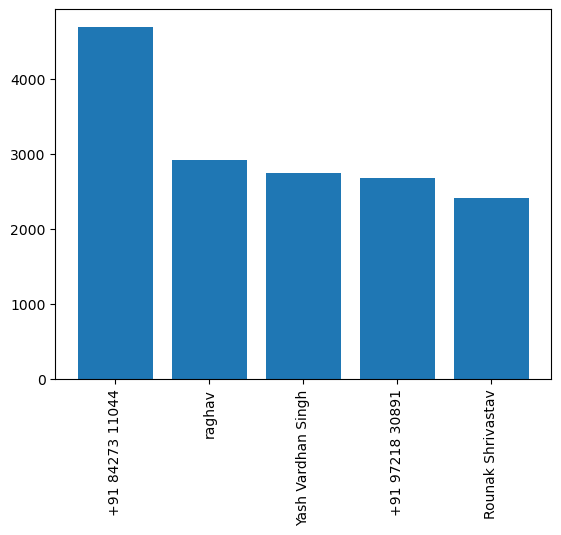

In [29]:
name = x.index
count= x.values

plt.bar(name, count)
plt.xticks(rotation='vertical')
plt.show()

In [30]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name', 'user':'percent'})

,name,percent
0,+91 84273 11044,10.79
1,raghav,6.73
2,Yash Vardhan Singh,6.32
3,+91 97218 30891,6.17
4,Rounak Shrivastav,5.56
...,...,...
111,+91 99145 22254,0.00
112,+91 62011 66709,0.00
113,+91 82229 24493,0.00
114,+91 98119 76007,0.00


In [31]:
# finding the 20 - 25 words used mostly in the discussion
words=[]

for message in df['message']:
    words.extend(message.split())
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 'Madhav',
 'Chaabra',
 '2',
 'created',
 'group',
 '"IT',
 'Section',
 '2',
 'Group',
 '1"',
 'You',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'Could',
 'someone',
 'share',
 "yesterday's",
 'calculus',
 'notes',
 'Rahul',
 'Kanaujiya',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+91',
 '70115',
 '07711',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'Trishan',
 'Preet',
 'Singh',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+91',
 '78705',
 '13989',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'Can',
 'you',
 'share',
 'yesterday',
 'class',
 'of',
 'calculus',
 'Trishan',
 'Preet',
 'Singh',
 'left',
 '+91',
 '88711',
 '99809',
 'joined',
 'using',
 'thi

In [32]:
# remove group notifications an media ommited
temp = df[df['user'] != 'group_notification']
temp  = temp[temp['message'] != '<Media omitted>\n']

In [33]:
f = open('stop_hinglish.txt', 'r')
stop_words = f.read()
print(stop_words)

a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
couldn
couldnt
couldn't
d
de
dede
dega
d

In [34]:
words = []

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [35]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,class,1839
1,message,1521
2,deleted,1322
3,😂,1322
4,?,1156
5,happy,1130
6,birthday,1012
7,mam,959
8,+1,607
9,2,536


In [36]:
!pip install emoji


In [37]:
import emoji

In [38]:
emojis = []
# for message in df['message']:
#     emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [39]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,4305
1,🥳,718
2,🤣,650
3,👍,586
4,🎉,476
...,...,...
394,🕒,1
395,🕓,1
396,⁉,1
397,🛵,1


In [40]:
df['month_num'] = df['date'].dt.month

In [41]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

In [42]:
timeline

,year,month_num,month,message
0,2021,11,November,824
1,2021,12,December,8019
2,2022,1,January,8165
3,2022,2,February,4591
4,2022,3,March,4191
5,2022,4,April,1680
6,2022,5,May,1778
7,2022,6,June,1618
8,2022,7,July,754
9,2022,8,August,332


In [43]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-"+ str(timeline['year'][i]))

In [44]:
timeline['time'] = time

In [45]:
timeline

,year,month_num,month,message,time
0,2021,11,November,824,November-2021
1,2021,12,December,8019,December-2021
2,2022,1,January,8165,January-2022
3,2022,2,February,4591,February-2022
4,2022,3,March,4191,March-2022
5,2022,4,April,1680,April-2022
6,2022,5,May,1778,May-2022
7,2022,6,June,1618,June-2022
8,2022,7,July,754,July-2022
9,2022,8,August,332,August-2022


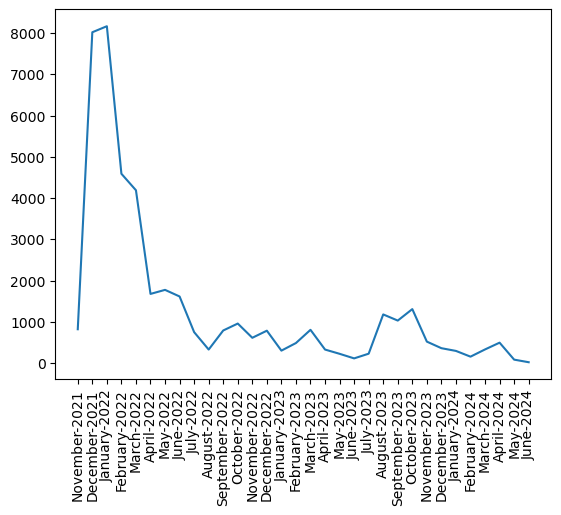

In [46]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation='vertical')
plt.show()


In [47]:
df['only_date'] =  df['date'].dt.date

In [48]:
df.groupby('only_date').count()['message'].reset_index()

,only_date,message
0,2021-11-20,1
1,2021-11-24,95
2,2021-11-25,286
3,2021-11-26,299
4,2021-11-27,13
...,...,...
725,2024-05-27,10
726,2024-05-28,1
727,2024-05-30,1
728,2024-06-02,1


In [49]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

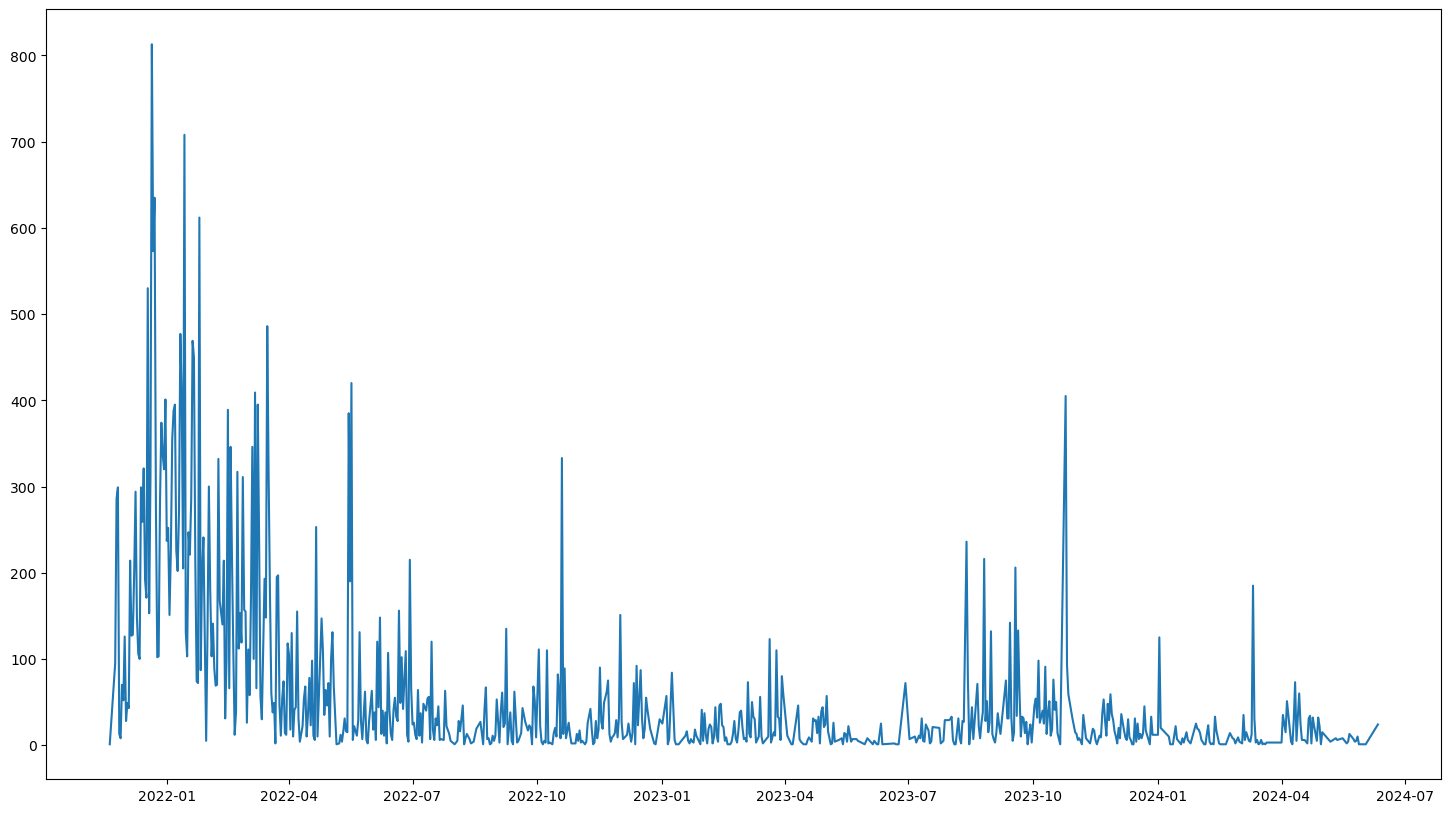

In [50]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])

In [51]:
# sabse zyada active group members konse day ko rehta hai
# same for the month
df['date'].dt.day_name()

0        Wednesday
1         Saturday
2        Wednesday
3        Wednesday
4        Wednesday
           ...    
43450      Tuesday
43451      Tuesday
43452      Tuesday
43453      Tuesday
43454      Tuesday
Name: date, Length: 43455, dtype: object

In [52]:
df['day_name'] = df['date'].dt.day_name()

In [53]:
df['day_name'].value_counts()

Tuesday      7916
Wednesday    7607
Thursday     7549
Monday       6101
Friday       5921
Sunday       4239
Saturday     4122
Name: day_name, dtype: int64

In [56]:
# heatmap

period = []
for hour in df[['day_name','hour',]]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" +str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [57]:
df['period'] = period

In [58]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
38503,2023-08-26 20:18:00,Yash Vardhan Singh,Lmao\n,2023,August,26,20,18,8,2023-08-26,Saturday,20-21
41089,2023-10-27 10:21:00,Shubham Dev,😂😂🤝🏻\n,2023,October,27,10,21,10,2023-10-27,Friday,10-11
15392,2022-01-22 19:02:00,Yash Vardhan Singh,Mail it to jatindersinghverka@yahoo.co.in\n,2022,January,22,19,2,1,2022-01-22,Saturday,19-20
4241,2021-12-19 18:53:00,Riyan,wtf is sec b?\n,2021,December,19,18,53,12,2021-12-19,Sunday,18-19
36719,2023-03-31 18:43:00,Kunal,This message was deleted\n,2023,March,31,18,43,3,2023-03-31,Friday,18-19


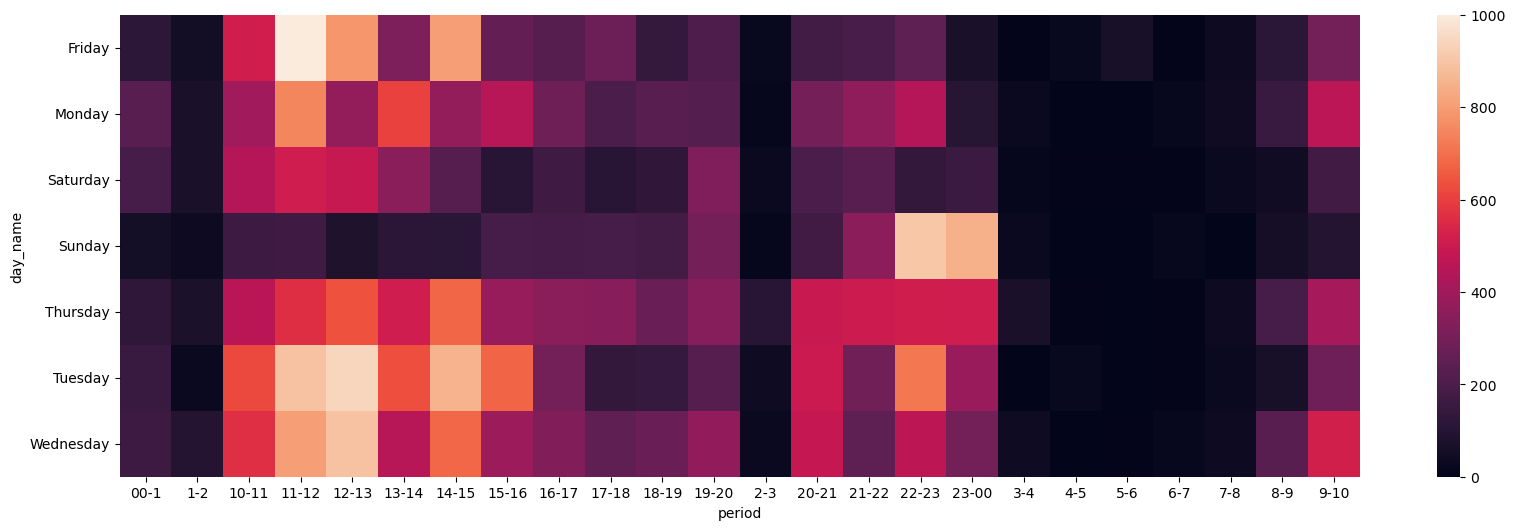

In [59]:
import seaborn as sns
plt.figure(figsize = (20,6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc="count").fillna(0))
plt.yticks(rotation="horizontal")
plt.show()